Bachelor thesis - Richard Borschke - 7337876 - University of Cologne - A spatio-temporal analysis of usage patterns in free-floating shared mobility


# Clustering Trip Types

This notebook contains the identification of trip types. Following steps are performed:
* Data scaling
* ########## Clustering of trip types
* Evaluation of clustering
* Distribution of identified trip types among mobility modes

### Imports

In [1]:
import pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np

### Load Data

In [2]:
# load monthly data of mode based on selected months
def load_data(mode, months):
    first_read = True
    
    for month in months:
        data_month = pd.concat([pd.read_csv(file) for file in glob.glob('Data/Modes/data_supplemented_{}_{}.csv'.format(mode, month))], ignore_index = True)
        if (first_read):
            data_full = data_month
            first_read = False
        else:
            data_full = pd.concat([data_full, data_month], ignore_index=True)
    
    return data_full

# load full data of mode
def load_data_mode_full(mode):
    data_mode_full = pd.read_csv('Data/Modes/data_supplemented_full_{}.csv'.format(mode))
    
    return data_mode_full

In [3]:
# define months for data loading (YYYYMM)
months = ['201911', '201912', '202001', '202002']

#load data by months
load_monthly_data = False

if (load_monthly_data):
    data_car = load_data('car', months)
    data_bicycle = load_data('bicycle', months)
    data_scooter = load_data('scooter', months)
    data_full = pd.concat([data_car, data_bicycle, data_scooter], ignore_index=True)

In [4]:
# read in desired data
# set True if full data set load is desired
load_full_data = True

if (load_full_data):
    data_car = load_data_mode_full('car')
    data_bicycle = load_data_mode_full('bicycle')
    data_scooter = load_data_mode_full('scooter')
    data_full = pd.concat([data_car, data_bicycle, data_scooter], ignore_index=True)

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410295 entries, 0 to 410294
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   410295 non-null  object 
 1   provider                             410295 non-null  object 
 2   vehicleType                          410295 non-null  object 
 3   date_start                           410295 non-null  object 
 4   time_start                           410295 non-null  int64  
 5   date_end                             410295 non-null  object 
 6   time_end                             410295 non-null  int64  
 7   year                                 410295 non-null  int64  
 8   month                                410295 non-null  int64  
 9   weekday                              410295 non-null  int64  
 10  hour                                 410295 non-null  int64  
 11  weekend      

In [16]:
d=data_full[data_full['POI_aero_end']>0]
d[d['duration']>7200].count()

id                                     927
provider                               927
vehicleType                            927
date_start                             927
time_start                             927
date_end                               927
time_end                               927
year                                   927
month                                  927
weekday                                927
hour                                   927
weekend                                927
longitude_start                        927
latitude_start                         927
longitude_end                          927
latitude_end                           927
coordinates_start                      927
coordinates_end                        927
distance                               927
duration                               927
speed                                  927
dist_center_start                      927
dist_center_end                        927
POI_aero_st

### Data preparation for clustering

In [6]:
data = data_full.copy()

# binary dummies for time basket column
#dummy = pd.get_dummies(data['time_basket'])



# merge normalized df with dummy df
#data = data.merge(dummy, right_index = True, left_index = True)




# dropping features
data.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_basket',
           'weekday', 'weekend'], axis=1, inplace=True)
# time_start and weekday and weekend XOR time basketabs

#'time_start',

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

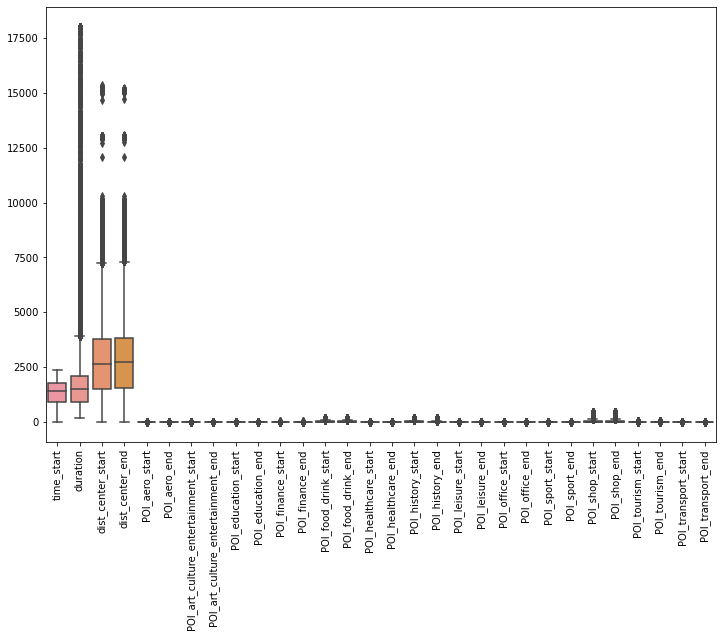

In [7]:
# 
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [8]:
#Normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Get column names
names = data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=names) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

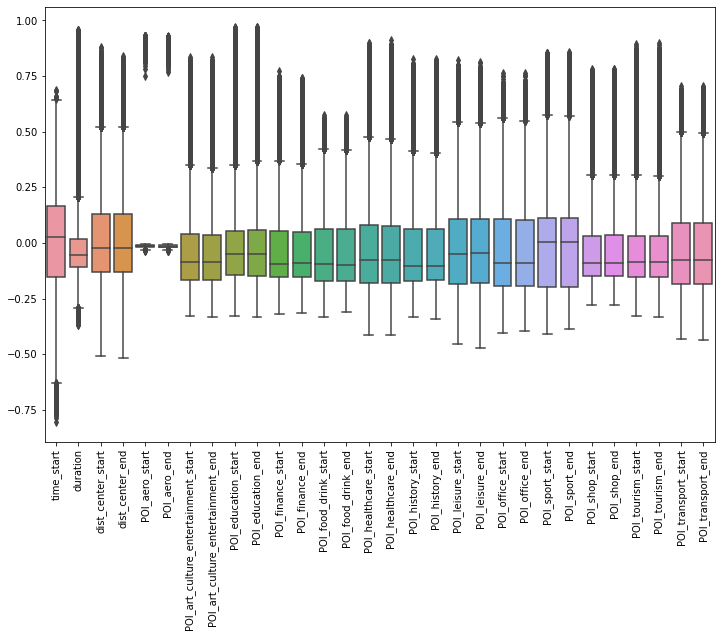

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=normalized_df)
plt.xticks(rotation=90)

### Cluster Tendency

In [10]:
X = normalized_df.copy()
X.drop(['time_start'], axis=1, inplace=True)

In [11]:
from pyclustertend import hopkins

hopkins(X,100)

0.1036481947708156

In [12]:
from pyclustertend import hopkins
#from sklearn.preprocessing import scale
#X = scale(datasets.load_iris().data)
hopkins(normalized_df,100)

0.1166433604907521

In [13]:
# merge normalized df with dummy df
#normalized_df = normalized_df.merge(dummy, right_index = True, left_index = True)
#normalized_df.info()

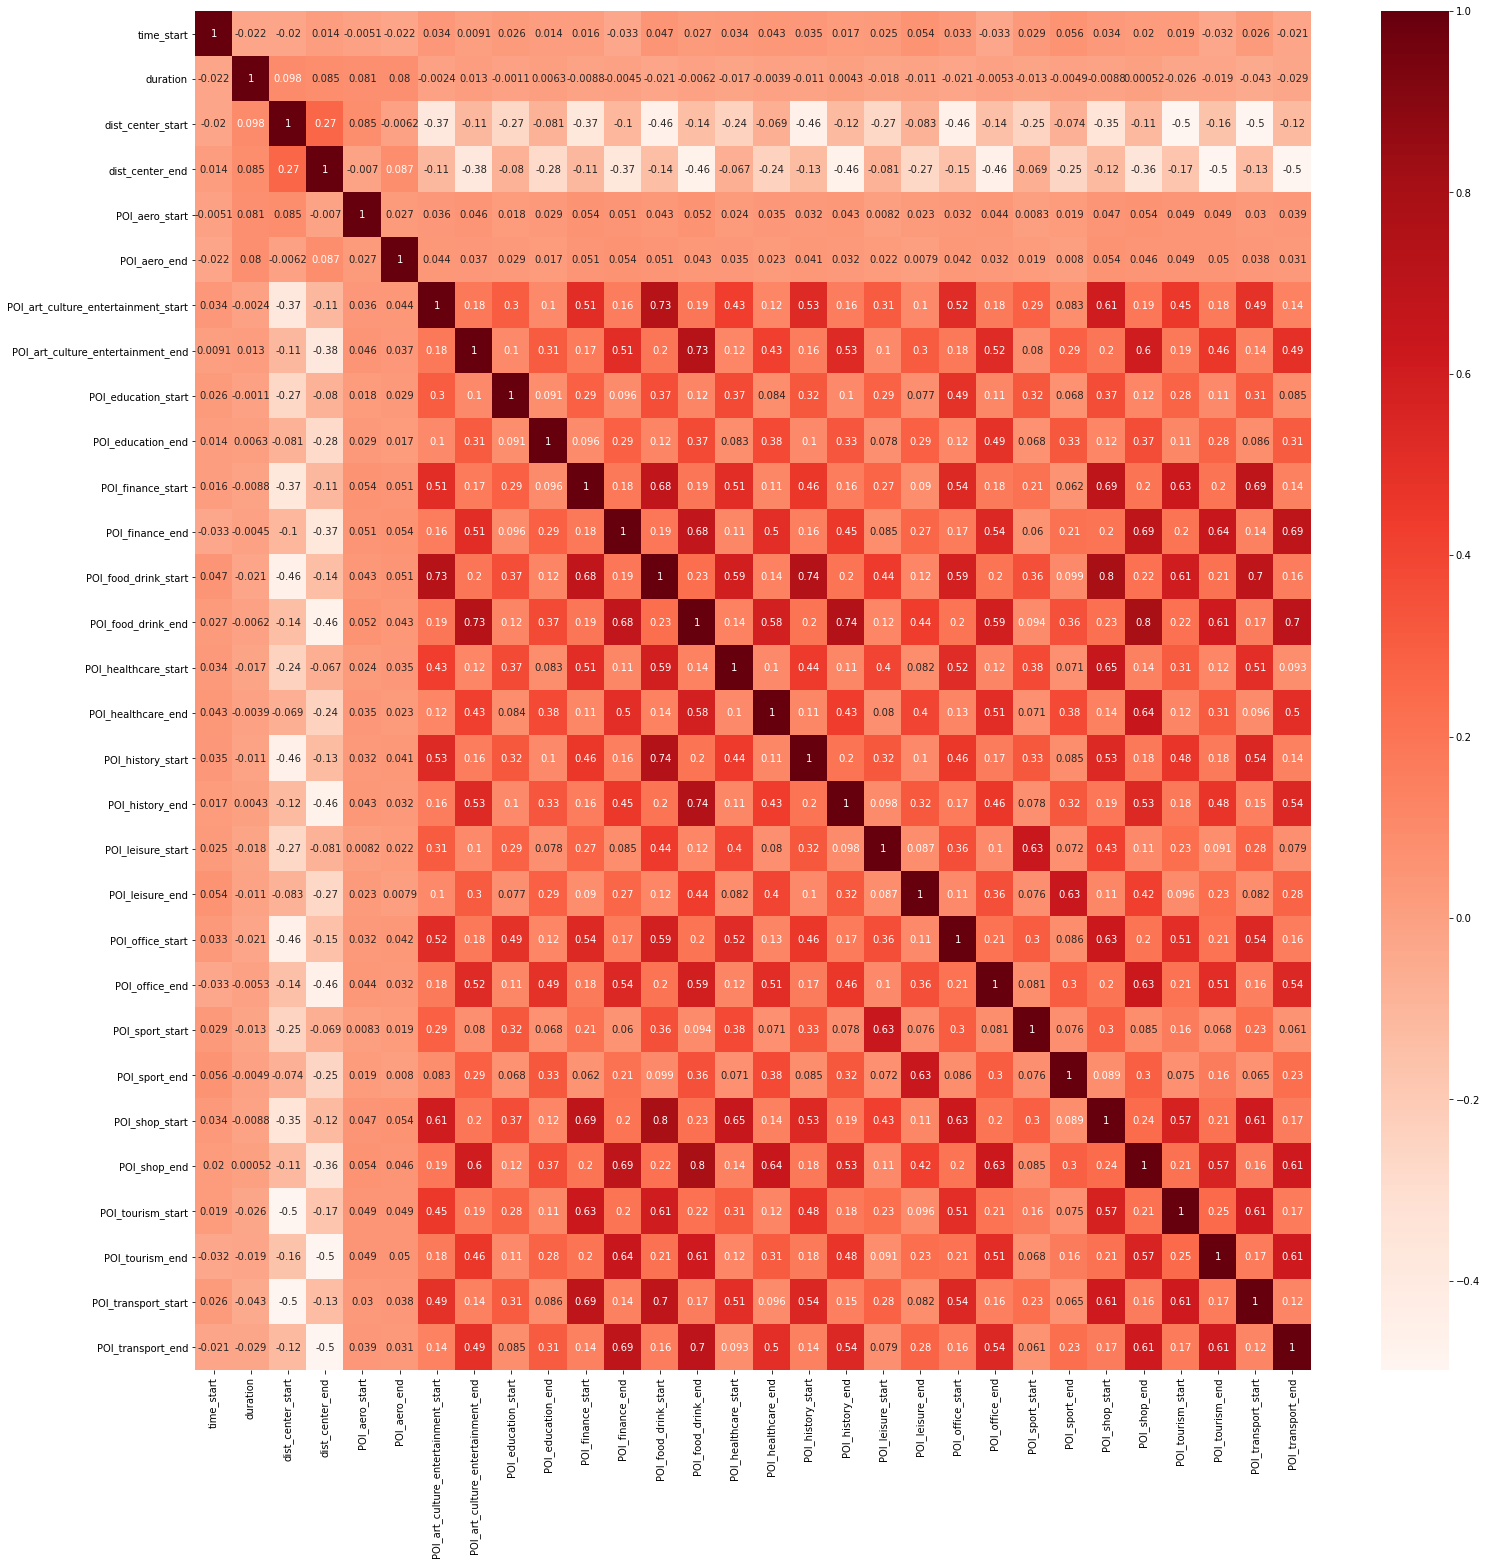

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = normalized_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
df_sample = normalized_df.sample(n=100, random_state=1)
df_sample

,time_start,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,...,POI_office_start,POI_office_end,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end
90054,0.046629,-0.007729,-0.034783,-0.108066,-0.006852,-0.006998,0.005329,0.188808,0.021570,0.163917,...,0.087624,0.314585,0.089611,0.003509,0.063346,0.575234,-0.008906,0.225603,0.217146,0.183971
34736,-0.228841,-0.022341,0.256063,0.267276,-0.018858,-0.019260,-0.085293,0.016471,-0.189020,0.193748,...,-0.258982,0.136802,-0.230324,0.009659,-0.180263,-0.166427,-0.078461,-0.128846,-0.271860,-0.216407
209618,-0.338404,0.013950,0.202792,0.527667,-0.014663,-0.014976,-0.144046,-0.143696,-0.146975,-0.049497,...,-0.158164,-0.198865,-0.179092,-0.178138,-0.124319,-0.142303,-0.102958,-0.141829,-0.131847,-0.208412
319295,-0.164903,-0.069809,-0.078790,-0.090132,-0.007233,-0.007388,0.158994,0.508135,0.022772,-0.024416,...,0.113820,0.224555,0.094602,-0.087875,0.121593,0.133362,0.197534,0.032747,0.190003,0.035804
78917,0.027646,-0.073644,-0.387623,0.334683,-0.023164,-0.023658,0.018017,-0.103385,0.072925,-0.236282,...,-0.181595,-0.245269,-0.282918,0.011865,-0.031170,-0.173873,0.301240,-0.158267,0.231507,-0.202410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59879,-0.055947,0.315477,0.062299,0.519701,-0.015642,-0.015976,-0.153662,-0.153288,-0.053771,-0.159554,...,-0.168721,-0.212139,-0.191046,-0.190029,-0.085285,-0.151802,-0.109831,-0.151296,-0.225499,-0.222324
154274,-0.200636,0.420990,-0.177496,-0.079220,-0.017336,-0.017705,-0.170297,-0.169883,-0.059592,-0.176827,...,-0.186986,-0.235104,0.007497,-0.210601,-0.158215,-0.164424,-0.121721,-0.167675,-0.014819,-0.246392
354365,0.077328,-0.092183,-0.106403,-0.088626,-0.009421,-0.009621,0.506682,0.209322,0.029657,0.096787,...,0.037192,0.068340,0.242340,-0.114446,0.221481,0.024562,-0.039195,0.122910,0.170803,0.020840
58707,0.427598,-0.109164,-0.042664,0.055770,-0.019599,-0.020017,-0.192532,-0.192064,-0.067373,-0.199915,...,-0.153645,-0.149236,0.008476,-0.238098,-0.056026,-0.168657,-0.081544,0.311368,0.142718,0.097011


### K-means

In [16]:
#KMeans Clustering
#Defining WCSS Elbow point
from sklearn.cluster import KMeans
import time

wcss=[]
for i in range (1,30):
    start = time.time()
    kmeans = KMeans(i)
    kmeans.fit(df_sample)
    wcss.append(kmeans.inertia_)
    end = time.time()
    print(i)
    print(end - start)
wcss

1
0.03191423416137695
2
0.03889727592468262
3
0.03390860557556152
4
0.04388308525085449
5
0.053854942321777344
6
0.04388260841369629
7
0.03391122817993164
8
0.03590226173400879
9
0.0399327278137207
10
0.04089069366455078
11
0.042845964431762695
12
0.052858829498291016
13
0.051897287368774414
14
0.06379413604736328
15
0.07679557800292969
16
0.08776521682739258
17
0.07782936096191406
18
0.08972334861755371
19
0.0927889347076416
20
0.10069036483764648
21
0.1047220230102539
22
0.10871386528015137
23
0.10175848007202148
24
0.11266398429870605
25
0.07779169082641602
26
0.08676648139953613
27
0.07982277870178223
28
0.08772897720336914
29
0.1296541690826416


[97.03946217923318,
 72.10464964910616,
 65.25821619847419,
 59.5997589135242,
 55.04599646723661,
 51.77030394795732,
 48.91895059736372,
 46.743451293121424,
 44.78004443363345,
 44.17082235366445,
 42.074254913169575,
 40.41789195415224,
 39.63225287263705,
 38.744569999034326,
 36.92907867859334,
 36.35901903428818,
 35.44071878602717,
 34.414648160762034,
 33.446420908612026,
 32.70811018580435,
 31.738914981745197,
 30.402122321676455,
 29.602460571438176,
 28.403054096314637,
 28.22340338370941,
 26.73330977703057,
 25.935541116752344,
 25.048765486889987,
 25.196281615210623]

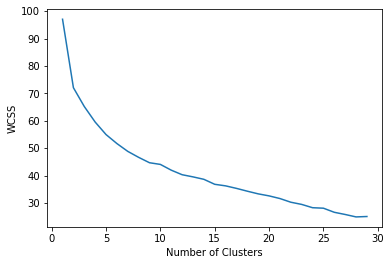

In [17]:
#Elbow Plot
plt.plot(range(1,30),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

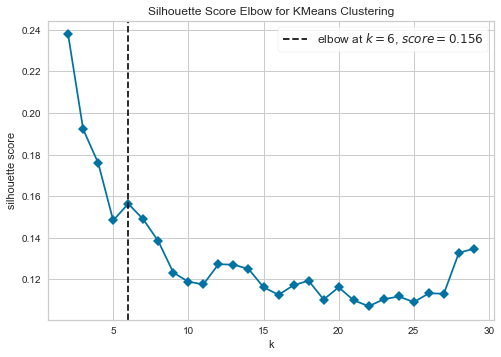

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [18]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(df_sample)    
visualizer.poof()

In [19]:
k = 9
k_means_new=KMeans(k)
kmeans.fit(df_sample)
cluster_new = df_sample.copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(df_sample)
cluster_new

,time_start,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,...,POI_office_end,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end,cluster_pred
90054,0.046629,-0.007729,-0.034783,-0.108066,-0.006852,-0.006998,0.005329,0.188808,0.021570,0.163917,...,0.314585,0.089611,0.003509,0.063346,0.575234,-0.008906,0.225603,0.217146,0.183971,3
34736,-0.228841,-0.022341,0.256063,0.267276,-0.018858,-0.019260,-0.085293,0.016471,-0.189020,0.193748,...,0.136802,-0.230324,0.009659,-0.180263,-0.166427,-0.078461,-0.128846,-0.271860,-0.216407,4
209618,-0.338404,0.013950,0.202792,0.527667,-0.014663,-0.014976,-0.144046,-0.143696,-0.146975,-0.049497,...,-0.198865,-0.179092,-0.178138,-0.124319,-0.142303,-0.102958,-0.141829,-0.131847,-0.208412,5
319295,-0.164903,-0.069809,-0.078790,-0.090132,-0.007233,-0.007388,0.158994,0.508135,0.022772,-0.024416,...,0.224555,0.094602,-0.087875,0.121593,0.133362,0.197534,0.032747,0.190003,0.035804,3
78917,0.027646,-0.073644,-0.387623,0.334683,-0.023164,-0.023658,0.018017,-0.103385,0.072925,-0.236282,...,-0.245269,-0.282918,0.011865,-0.031170,-0.173873,0.301240,-0.158267,0.231507,-0.202410,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59879,-0.055947,0.315477,0.062299,0.519701,-0.015642,-0.015976,-0.153662,-0.153288,-0.053771,-0.159554,...,-0.212139,-0.191046,-0.190029,-0.085285,-0.151802,-0.109831,-0.151296,-0.225499,-0.222324,5
154274,-0.200636,0.420990,-0.177496,-0.079220,-0.017336,-0.017705,-0.170297,-0.169883,-0.059592,-0.176827,...,-0.235104,0.007497,-0.210601,-0.158215,-0.164424,-0.121721,-0.167675,-0.014819,-0.246392,5
354365,0.077328,-0.092183,-0.106403,-0.088626,-0.009421,-0.009621,0.506682,0.209322,0.029657,0.096787,...,0.068340,0.242340,-0.114446,0.221481,0.024562,-0.039195,0.122910,0.170803,0.020840,3
58707,0.427598,-0.109164,-0.042664,0.055770,-0.019599,-0.020017,-0.192532,-0.192064,-0.067373,-0.199915,...,-0.149236,0.008476,-0.238098,-0.056026,-0.168657,-0.081544,0.311368,0.142718,0.097011,2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

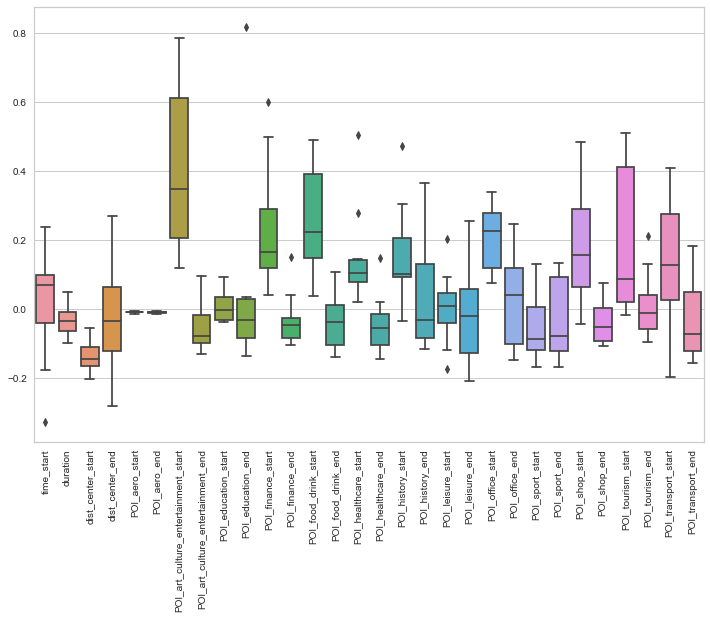

In [20]:
cluster = cluster_new[cluster_new['cluster_pred']==1].copy()
cluster = cluster.drop(['cluster_pred'], axis = 1)
plt.figure(figsize=(12,8))
sns.boxplot(data=cluster)
plt.xticks(rotation=90)

### K-prototypes

In [21]:
data_proto = data_full.copy()
data_basket = data_proto['time_basket'].copy()

# dropping features
data_proto.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_start', 'time_basket',
           'weekday', 'weekend'], axis=1, inplace=True)

In [22]:
#Normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Get column names
names = data_proto.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_data = scaler.fit_transform(data_proto)
scaled_data = pd.DataFrame(scaled_data, columns=names)
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data,columns=names) 

In [23]:
normalized_data = normalized_data.merge(data_basket, right_index = True, left_index = True)

In [24]:
#type(full_d)

#full_data.info()

In [173]:
import plotly.graph_objects as go

#OPTIONAL: Elbow plot with cost (will take a LONG time)
costs = []
n_clusters = []
clusters_assigned = []

#for i in tqdm(range(2, 25)):
for i in range(2, 15):

    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', n_init=15, verbose=2, n_jobs=-1)
        clusters = kproto.fit_predict(kprot_data, categorical=[29])
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")
        
        
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
fig.show()

Best run was number 10
Best run was number 3
Best run was number 9
Best run was number 5
Best run was number 5
Best run was number 15
Best run was number 13
Best run was number 12
Best run was number 10
Best run was number 14


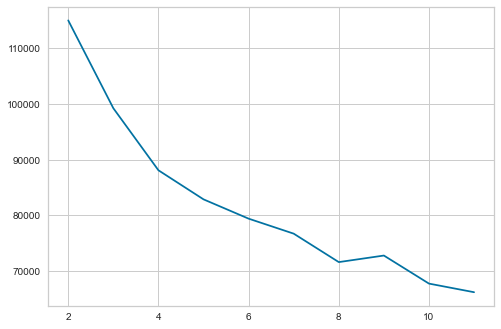

In [174]:
plt.plot(n_clusters, costs)

C:\Users\User_Vratar\Anaconda3\lib\site-packages\umap\umap_.py:1530: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



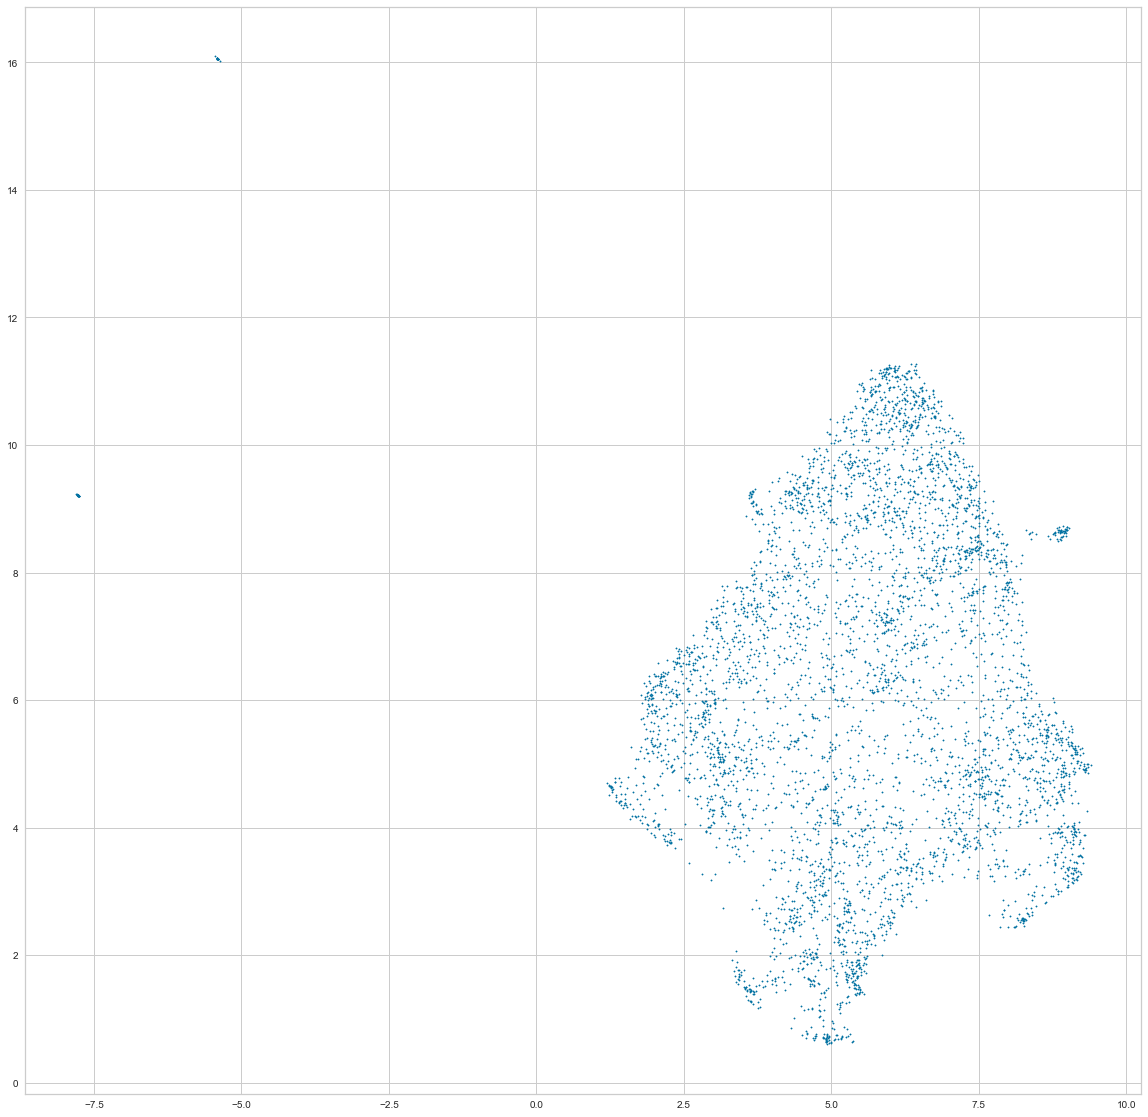

In [148]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import umap
full_data1 = data_full.copy()
full_data2 = full_data1.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_start',
           'weekday', 'weekend'], axis=1)
full_data = full_data2.sample(n=5000, random_state=1).copy()


#Preprocessing numerical
numerical = full_data.select_dtypes(exclude='object').copy()

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False)

plt.figure(figsize=(20, 20))
plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

In [149]:
kprot_data = full_data.copy()
from kmodes.kprototypes import KPrototypes
#Pre-processing
for c in full_data.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

categorical_columns = [29] #make sure to specify correct indices

#Actual clustering
kproto = KPrototypes(n_clusters= 10, init='Cao', n_jobs=-1)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

#Prints the count of each cluster group
pd.Series(clusters).value_counts()



8    762
5    750
7    729
1    602
6    574
2    562
3    521
4    459
0     22
9     19
dtype: int64

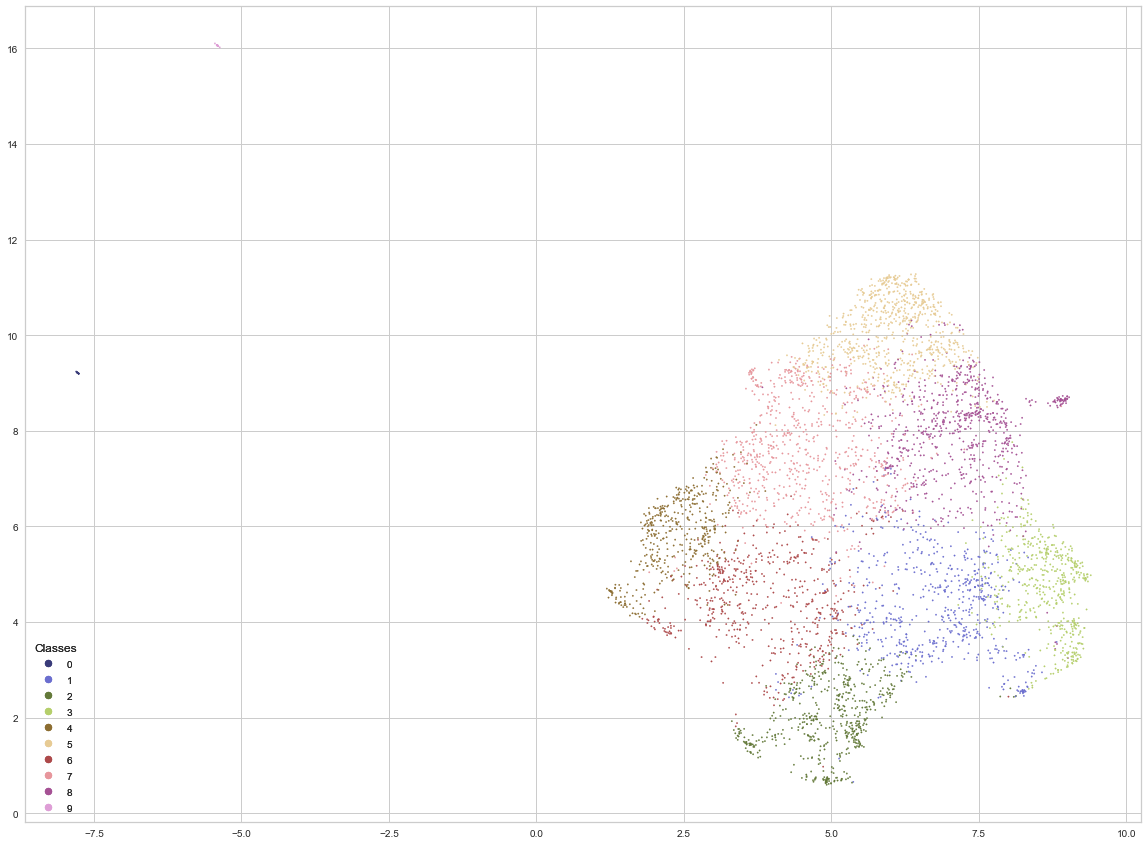

In [150]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 15))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=10),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [151]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)
cluster_dict

[2,
 7,
 8,
 2,
 1,
 5,
 2,
 1,
 7,
 1,
 2,
 3,
 1,
 2,
 5,
 2,
 8,
 2,
 7,
 2,
 5,
 2,
 5,
 2,
 3,
 6,
 7,
 8,
 5,
 7,
 8,
 7,
 6,
 8,
 3,
 5,
 3,
 2,
 8,
 1,
 7,
 7,
 3,
 1,
 7,
 5,
 1,
 4,
 7,
 8,
 8,
 7,
 2,
 8,
 8,
 4,
 5,
 5,
 4,
 7,
 4,
 5,
 2,
 2,
 3,
 7,
 2,
 5,
 8,
 5,
 5,
 2,
 8,
 6,
 7,
 7,
 1,
 2,
 7,
 8,
 2,
 6,
 2,
 2,
 4,
 8,
 8,
 1,
 4,
 7,
 8,
 5,
 6,
 1,
 7,
 8,
 8,
 2,
 8,
 1,
 2,
 4,
 5,
 5,
 3,
 8,
 3,
 1,
 5,
 2,
 5,
 4,
 3,
 2,
 6,
 8,
 3,
 4,
 3,
 5,
 8,
 5,
 6,
 8,
 7,
 3,
 8,
 2,
 5,
 6,
 4,
 7,
 8,
 5,
 6,
 1,
 3,
 1,
 5,
 2,
 1,
 1,
 8,
 6,
 7,
 4,
 1,
 7,
 4,
 2,
 6,
 2,
 3,
 5,
 9,
 3,
 6,
 8,
 6,
 8,
 6,
 3,
 1,
 9,
 7,
 7,
 8,
 6,
 6,
 5,
 5,
 3,
 1,
 4,
 6,
 2,
 1,
 1,
 2,
 2,
 6,
 4,
 1,
 4,
 2,
 7,
 6,
 7,
 2,
 8,
 1,
 3,
 7,
 5,
 2,
 3,
 7,
 3,
 8,
 6,
 1,
 5,
 3,
 1,
 1,
 6,
 2,
 8,
 5,
 3,
 4,
 7,
 6,
 6,
 7,
 4,
 8,
 6,
 8,
 7,
 4,
 3,
 4,
 6,
 1,
 6,
 7,
 8,
 6,
 4,
 8,
 7,
 6,
 6,
 6,
 6,
 8,
 6,
 7,
 6,
 1,
 5,
 4,
 6,
 7,
 3,
 5,
 8,
 6,
 6,


In [152]:
full_data['cluster']=cluster_dict
full_data

,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,POI_finance_start,...,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end,time_basket,cluster
90054,1807.0,2281,1028,0,0,2,7,2,5,6,...,2,1,88,426,3,15,17,15,evening_peak_time,2
34736,1799.0,4507,4618,0,0,1,2,0,3,0,...,0,1,1,4,2,1,0,1,weekday_daytime,7
209618,2101.0,4537,7233,0,0,0,0,0,1,1,...,0,0,6,0,1,0,2,0,morning_peak_time,8
319295,602.0,1587,1425,0,0,6,15,2,1,5,...,2,0,123,128,13,5,15,7,morning_peak_time,2
78917,1517.0,890,4651,0,0,2,1,2,0,0,...,0,1,39,10,8,1,9,2,weekday_daytime,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231074,1500.0,3774,4215,0,0,1,0,1,0,4,...,1,0,47,3,0,0,6,2,weekday_evening,8
316365,601.0,991,774,0,0,4,1,1,1,5,...,3,2,23,95,4,10,8,10,weekend_nighttime,2
118807,3601.0,1548,259,0,0,3,3,1,1,5,...,2,0,64,39,7,8,8,24,weekday_nighttime,2
17503,2098.0,1325,3285,0,0,0,1,0,1,2,...,0,0,5,8,3,0,4,0,morning_peak_time,8


In [172]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
number_of_clusters = 10

cat = full_data.join(pd.get_dummies(full_data['time_basket']))
cat_features = cat.iloc[:,30:].groupby(by=["cluster"]).sum().copy()

poi_features = full_data.iloc[:,3:29].copy()
for column in poi_features.columns:
    poi_features.loc[poi_features[column] > 0, column] = 1

poi_features['cluster'] = cluster_dict
poi_features = poi_features.groupby(by=["cluster"]).sum()
poi_features.columns = [str(col) + '_(%)' for col in poi_features.columns]


x = pd.Series(clusters).value_counts().sort_index()
for i in range(1, number_of_clusters+1):
    cat_features.iloc[i-1:i] = (cat_features.iloc[:i] / x.iloc[i-1]).round(2)
    poi_features.iloc[i-1:i] = (poi_features.iloc[:i] / x.iloc[i-1]).round(2)


#num_features = full_data.groupby(by=["cluster"]).mean().copy()
num_features = full_data.iloc[:,:3]
num_features['cluster'] = cluster_dict
num_features = num_features.groupby(by=["cluster"]).mean().copy()

cluster_features = num_features.join(cat_features)
cluster_features = cluster_features.join(poi_features)
#print_full()
cluster_features.T

cluster_features.T.to_csv(index=False)
cluster_features.T.to_excel("cluster.xlsx")  

In [154]:
x = pd.Series(clusters).value_counts().sort_index()
x.iloc[0]

22

In [176]:
cat_features = cat.iloc[:,30:].groupby(by=["cluster"]).sum().copy()
#cat_features.iloc[1:2]

#poi_features['cluster'] = cluster_dict
#poi_features.groupby(by=["cluster"]).sum()

In [177]:
pd.Series(clusters).value_counts()

9     649
3     633
7     554
8     550
4     542
5     525
10    520
6     499
1     487
2      22
0      19
dtype: int64

In [168]:
num_features = full_data.iloc[:,:3]
num_features['cluster'] = cluster_dict
num_features = num_features.groupby(by=["cluster"]).mean().copy()
num_features

,duration,dist_center_start,dist_center_end
cluster,,,
0,9013.863636,3374.818182,12944.863636
1,1918.980066,1947.971761,2742.531561
2,1163.437722,1102.355872,1196.336299
3,2070.600768,1507.391555,4098.821497
4,2127.553377,4030.786492,1484.339869
5,2127.138667,4493.938667,4452.472000
6,1568.378049,2346.559233,1597.092334
7,2158.355281,3618.902606,2952.545953
8,1843.034121,3070.320210,3990.337270
